# WeatherPy
----
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

##### Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Once you have computed the linear regression for one chart, the process will be similar for all others. As a bonus, try to create a function that will create these charts based on different parameters.

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Test of the citypy package
#lat_lng = str(input(f'Enter latitude and longtitude in form (lat,lng):'))
#lat,lng = lat_lng.split(',')
#city = citipy.nearest_city(float(lat), float(lng))
#set(dir(city))
#print(f"The cooridinates {lat},{lng} nearest city is: {city.city_name},{city.country_code}")


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

city_country = zip(cities,countries)
# Print the city count to confirm sufficient count
#print([i for i in city_country])
print(len(cities))


606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Export the city data into a .csv.


In [4]:
# Test of the API call and verification correct data is returned
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "grajau"
country_code = "br"
query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
response = requests.get(query_url).json()
print(query_url)

cityID = int(response['id'])
cityName = response['name']
countryCode = str(response['sys']['country'])
lat_val = float(response['coord']['lat'])
lon_val = float(response['coord']['lon'])
weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
temperature = float(response['main']['temp'])
humidity_val = float(response['main']['humidity'])
cloudiness_val = float(response['clouds']['all'])
windSpeed = float(response['wind']['speed'])

print(f"The weather date information received is: {weatherDate}")
print(f"The humidity information received is: {humidity_val}")
print(f"The clouds information received is: {cloudiness_val}")
print(f"The wind speed information received is: {windSpeed}")

http://api.openweathermap.org/data/2.5/weather?appid=6a6e5292617349bd250145ca6faa12c5&q=grajau,br&units=imperial
The weather date information received is: 01/24/20
The humidity information received is: 86.0
The clouds information received is: 100.0
The wind speed information received is: 1.83


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')
# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()

Camocim with city ID:3403687 was found in the Weathermap API

Kielce with city ID:769250 was found in the Weathermap API

Thompson with city ID:6165406 was found in the Weathermap API

Hermanus with city ID:3366880 was found in the Weathermap API

Richards Bay with city ID:962367 was found in the Weathermap API

codrington,ag was not found in the Weathermap API

Rio Gallegos with city ID:3838859 was found in the Weathermap API

Resistencia with city ID:3429577 was found in the Weathermap API

khonuu,ru was not found in the Weathermap API

Inhapim with city ID:3461214 was found in the Weathermap API

Tupik with city ID:2014836 was found in the Weathermap API

Lebu with city ID:3883457 was found in the Weathermap API

Puerto Ayora with city ID:3652764 was found in the Weathermap API

Castro with city ID:3896218 was found in the Weathermap API

Coyhaique with city ID:3894426 was found in the Weathermap API

Meulaboh with city ID:1214488 was found in the Weathermap API

Lynn Haven with cit

Angoram with city ID:2100765 was found in the Weathermap API

Katsuura with city ID:2112309 was found in the Weathermap API

vaitupu,wf was not found in the Weathermap API

Samarai with city ID:2132606 was found in the Weathermap API

Hilo with city ID:5855927 was found in the Weathermap API

Remedios with city ID:3701491 was found in the Weathermap API

Bambous Virieux with city ID:1106677 was found in the Weathermap API

illoqqortoormiut,gl was not found in the Weathermap API

Mana with city ID:3381041 was found in the Weathermap API

Srednekolymsk with city ID:2121025 was found in the Weathermap API

San Patricio with city ID:3985168 was found in the Weathermap API

Acapulco de Juarez with city ID:3533462 was found in the Weathermap API

Tiksi with city ID:2015306 was found in the Weathermap API

Talnakh with city ID:1490256 was found in the Weathermap API

Wa with city ID:2294206 was found in the Weathermap API

Bethel with city ID:5282297 was found in the Weathermap API

Bauchi wi

Sitka with city ID:5557293 was found in the Weathermap API

babanusah,sd was not found in the Weathermap API

Batagay-Alyta with city ID:2027042 was found in the Weathermap API

Ulaanbaatar with city ID:2028462 was found in the Weathermap API

Porto Torres with city ID:3170069 was found in the Weathermap API

marcona,pe was not found in the Weathermap API

Caravelas with city ID:3466980 was found in the Weathermap API

Pecos with city ID:5528182 was found in the Weathermap API

Helong with city ID:2036933 was found in the Weathermap API

Cockburn Town with city ID:3576994 was found in the Weathermap API

Cherskiy with city ID:2126199 was found in the Weathermap API

Dawson Creek with city ID:5935804 was found in the Weathermap API

Daokou with city ID:1813775 was found in the Weathermap API

Satuba with city ID:3387987 was found in the Weathermap API

Yinchuan with city ID:1786657 was found in the Weathermap API

Verkhnevilyuysk with city ID:2013639 was found in the Weathermap API

Wal

Maragogi with city ID:3395458 was found in the Weathermap API

Mlonggo with city ID:1635164 was found in the Weathermap API

Sayat with city ID:1218436 was found in the Weathermap API

Neuquen with city ID:3843123 was found in the Weathermap API

Filingue with city ID:2444995 was found in the Weathermap API

Kangaba with city ID:2455735 was found in the Weathermap API

San Quintin with city ID:3984997 was found in the Weathermap API

Formosa with city ID:3463140 was found in the Weathermap API

Novopokrovka with city ID:2018888 was found in the Weathermap API

Coruripe with city ID:3465329 was found in the Weathermap API

Machali with city ID:3881102 was found in the Weathermap API

Nyurba with city ID:2018735 was found in the Weathermap API

airai,pw was not found in the Weathermap API

Tsiroanomandidy with city ID:1054463 was found in the Weathermap API

Uthal with city ID:1162862 was found in the Weathermap API

Salinopolis with city ID:3389822 was found in the Weathermap API

Dzaou

Hervey Bay with city ID:2146219 was found in the Weathermap API

Price with city ID:5545269 was found in the Weathermap API

Tateyama with city ID:1850523 was found in the Weathermap API

Bend with city ID:5713587 was found in the Weathermap API

Nasirabad with city ID:1261727 was found in the Weathermap API

Vyartsilya with city ID:470762 was found in the Weathermap API

Keti Bandar with city ID:1174451 was found in the Weathermap API

Samoded with city ID:499025 was found in the Weathermap API

Celestun with city ID:3531368 was found in the Weathermap API

Talcahuano with city ID:3870282 was found in the Weathermap API

Naantali with city ID:645212 was found in the Weathermap API

Macau with city ID:3395998 was found in the Weathermap API

San Luis Rio Colorado with city ID:3985604 was found in the Weathermap API

Humaita with city ID:3664078 was found in the Weathermap API

karpenision,gr was not found in the Weathermap API

Winslow with city ID:5321473 was found in the Weathermap A

### Convert Raw Data to DataFrame
* Display the DataFrame

In [35]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3403687.0,Camocim,BR,-2.90,-40.84,01/24/20,80.55,77.0,92.0,8.25
1,769250.0,Kielce,PL,50.87,20.63,01/24/20,29.28,1.0,0.0,10.07
2,6165406.0,Thompson,CA,55.74,-97.86,01/24/20,19.40,79.0,40.0,6.93
3,3366880.0,Hermanus,ZA,-34.42,19.23,01/24/20,66.54,91.0,0.0,3.00
4,962367.0,Richards Bay,ZA,-28.78,32.04,01/24/20,77.70,78.0,69.0,20.76


In [36]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
weather_data_values = weather_data.dropna()
weather_data_values = weather_data_values.reset_index(drop=True)
weather_data_values['city_id'] = weather_data_values['city_id'].astype(int)
weather_data_values.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3403687,Camocim,BR,-2.90,-40.84,01/24/20,80.55,77.0,92.0,8.25
1,769250,Kielce,PL,50.87,20.63,01/24/20,29.28,1.0,0.0,10.07
2,6165406,Thompson,CA,55.74,-97.86,01/24/20,19.40,79.0,40.0,6.93
3,3366880,Hermanus,ZA,-34.42,19.23,01/24/20,66.54,91.0,0.0,3.00
4,962367,Richards Bay,ZA,-28.78,32.04,01/24/20,77.70,78.0,69.0,20.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

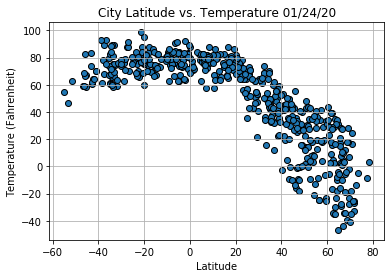

In [58]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values['weather_date'][0]
plt.scatter(weather_data_values["latitude"], weather_data_values["temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

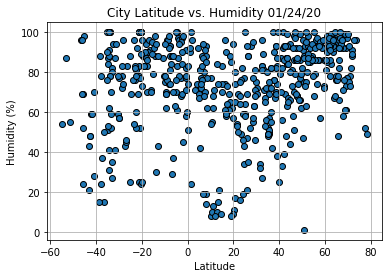

In [59]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["latitude"], weather_data_values["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

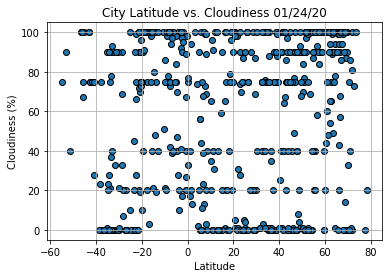

In [60]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["latitude"], weather_data_values["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

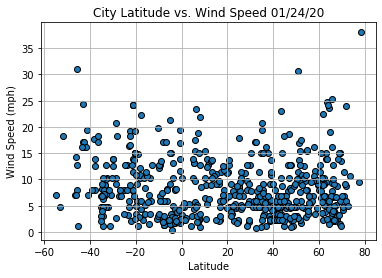

In [61]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values["latitude"], weather_data_values["wind_speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

In [28]:
# # Print out the r-squared value along with the plot.
# x_values = weather_data_values["latitude"]
# y_values = weather_data_values["wind_speed"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed (mph)')
# print(f"The r-squared is: {rvalue}")
# plt.show()

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Figures/{filename}')
    plt.show()

In [14]:
# test the function with a call
#make_lin_reg_plot(weather_data_values["latitude"],weather_data_values["wind_speed"],'Latitude','Wind Speed (mph)')

In [52]:
# Create Northern and Southern Hemisphere DataFrames
#weather_data_values.info()
crit_north = weather_data_values.latitude >= 0
crit_south = weather_data_values.latitude < 0

north_weather = weather_data_values[crit_north]
south_weather = weather_data_values[crit_south]
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.855041552378802
y = -1.4x + 92.44


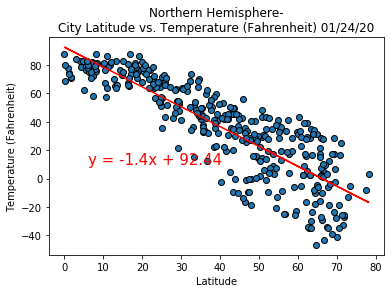

In [65]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.37260433438641316
y = 0.24x + 80.84


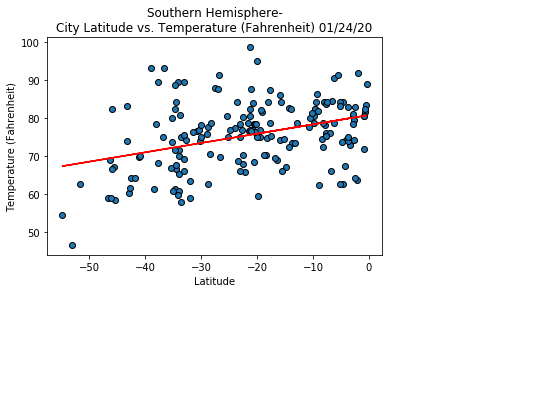

In [66]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4166057041770779
y = 0.45x + 56.17


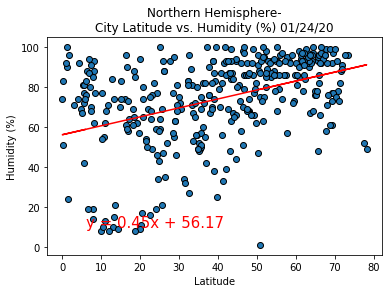

In [67]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3021000087925186
y = 0.49x + 84.39


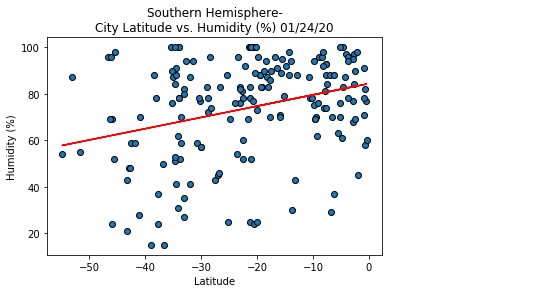

In [68]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23248910154289995
y = 0.45x + 39.35


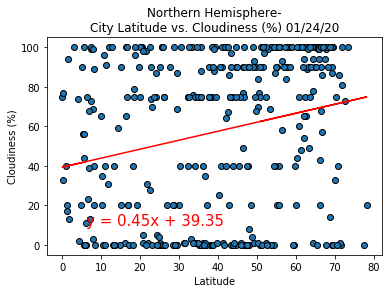

In [69]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21342733104064412
y = 0.6x + 71.02


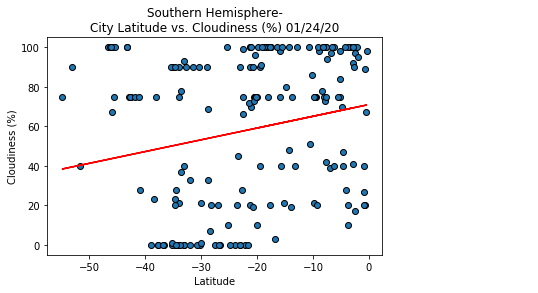

In [70]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08236535986222566
y = 0.02x + 7.06


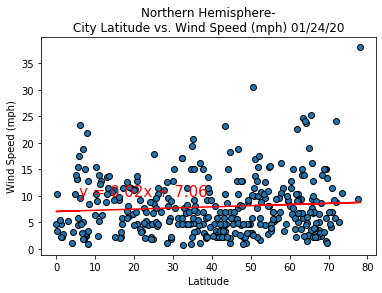

In [71]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23420231592386517
y = -0.1x + 6.96


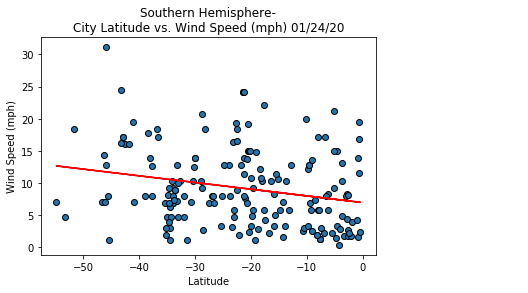

In [72]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png')